<a href="https://colab.research.google.com/github/archit1125/US-Election-Prediction-2020/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re 
import tweepy 
import pandas as pd 
import io 
from tweepy import OAuthHandler 
from textblob import TextBlob 
from google.colab import files 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls "/gdrive/MyDrive/ieee_data"


uselection_tweets_1jul_11nov.csv


In [ ]:
!cp -r "/gdrive/MyDrive/btp_data" .



In [ ]:
!ls

btp_data  ieee_data  sample_data


In [ ]:
fetched_tweets=pd.read_csv("ieee_data/data.csv")

In [ ]:
print(fetched_tweets)

         Created-At;"From-User-Id";"To-User-Id";"Language";"Retweet-Count";"PartyName";"Id";"Score";"Scoring String";"Negativity";"Positivity";"Uncovered Tokens";"Total Tokens"
0         7/1/20 7:44 PM;"1223446325758394369";"38788259...                                                                                                                     
1         7/1/20 7:44 PM;"1001407960252342273";"-1";"en"...                                                                                                                     
2         7/1/20 7:44 PM;"1178522693840392195";"-1";"en"...                                                                                                                     
3         7/1/20 7:44 PM;"64267482";"65497475";"en";0.0;...                                                                                                                     
4         7/1/20 7:44 PM;"1068507190103699456";"-1";"en"...                                                        

In [ ]:
daily_estimate={
    '7/1/20':0,
    '7/15/20':0,
    '7/29/20':0,
    '8/12/20':0,
    '8/26/20':0,
    '9/9/20':0,
    '9/23/20':0,
    '10/7/20':0,
    '10/21/20':0,
    '11/4/20':0
}


In [ ]:
daily_tweets={
    '7/1/20':[],
    '7/15/20':[],
    '7/29/20':[],
    '8/12/20':[],
    '8/26/20':[],
    '9/9/20':[],
    '9/23/20':[],
    '10/7/20':[],
    '10/21/20':[],
    '11/4/20':[]
}

In [ ]:
for i in range(len(fetched_tweets)) : 
    # print(type(fetched_tweets.iloc[i, 0]))
    # print(fetched_tweets.iloc[i, 0])
    tweet_data=fetched_tweets.iloc[i, 0].split(';')
    #print(tweets)
    date=tweet_data[0]
    day=date.split()[0]
    #print(day)
    if day in daily_tweets:
      daily_tweets[day].append(fetched_tweets.iloc[i, 0])
      print(day)

Streaming output truncated to the last 5000 lines.
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/20
11/4/

In [ ]:
for curr_date in daily_tweets:
  print(curr_date)
  print(len( daily_tweets[curr_date]))

7/1/20
30000
7/15/20
0
7/29/20
117973
8/12/20
129941
8/26/20
0
9/9/20
159853
9/23/20
134970
10/7/20
272401
10/21/20
378223
11/4/20
352646


In [ ]:
for curr_date in daily_tweets: 
  Users={}
  count=0
  #adding positive tweets for trump and subtracting negative tweets for trump
  print(type(fetched_tweets))
  print(len(fetched_tweets))
  print(curr_date)
  print(len( daily_tweets[curr_date]))
  for i in daily_tweets[curr_date] : 
    #print(i)
    tweet_data=i.split(';')
    #print(tweets)
    date=tweet_data[0]
    day=date.split()[0]
    count+=1
    user=tweet_data[1]
    score=float(tweet_data[7])
    partyName=tweet_data[5]
    print(user)
    print(score)
    print(partyName)
    if user not in Users:
      Users[user]=0
    if score > 0 :
      if partyName=='"Republicans"':
        Users[user]+=1
      elif partyName=='"Democrats"':
        Users[user]-=1
    elif score < 0:
      if partyName=='"Republicans"':
        Users[user]-=1
      elif partyName=='"Democrats"':
        Users[user]+=1

  pUsers=0
  nUsers=0
 
  for user in Users:
    if Users[user]>0:
      pUsers+=1
    elif Users[user]<0:
      nUsers+=1
  print(pUsers)
  print(nUsers)
  print(count)
  if pUsers+nUsers==0:
    continue
  print("Positive User for trump percentage: {} %".format(100*pUsers/(pUsers+nUsers))) 
  daily_estimate[curr_date]=100*pUsers/(pUsers+nUsers)
  
  print("Positive User for biden percentage: {} %".format(100*nUsers/(pUsers+nUsers))) 
  
  print("Neutral User percentage: {} %".format(100*(len(Users)-(pUsers+nUsers))/len(Users)))
  print(len(daily_estimate))



Streaming output truncated to the last 5000 lines.
"Republicans"
"4886325111"
-1.076923076923077
"Republicans"
"116488477"
0.0
"BothParty"
"1322180751589171200"
1.1538461538461537
"Republicans"
"530794312"
1.1538461538461537
"Republicans"
"1212530073187733505"
0.0
"Republicans"
"901621284714541056"
0.0
"Republicans"
"1308867274078642181"
0.5128205128205129
"Republicans"
"728605045189550081"
-0.8461538461538463
"Republicans"
"124111250"
0.5128205128205129
"Republicans"
"2747475264"
1.153846153846154
"Neither"
"1176195280246628353"
0.0
"Republicans"
"399831221"
-0.10256410256410259
"BothParty"
"62876704"
1.5897435897435896
"Republicans"
"2795572767"
0.0512820512820511
"Neither"
"54428595"
0.8717948717948718
"Neither"
"1323708518256451584"
-0.38461538461538464
"Republicans"
"1319805357623947264"
0.7179487179487181
"Democrats"
"1268691762236715009"
-0.23076923076923078
"Republicans"
"967607446708432897"
0.717948717948718
"BothParty"
"1222974026194264066"
0.2820512820512821
"Democrats"
"378

In [ ]:
print(daily_estimate)

{'7/1/20': 40.29524742035098, '7/15/20': 44.30008261893214, '7/29/20': 48.3049178175133, '8/12/20': 46.41668093525864, '8/26/20': 48.255618098321136, '9/9/20': 50.09455526138363, '9/23/20': 51.05235411006124, '10/7/20': 49.950621973221914, '10/21/20': 49.39640305493964, '11/4/20': 42.72210084578944}


In [ ]:
daily_estimate['7/15/20']=(daily_estimate['7/1/20']+daily_estimate['7/29/20'])/2
daily_estimate['8/26/20']=(daily_estimate['8/12/20']+daily_estimate['9/9/20'])/2

In [ ]:
daily_updated_estimate={
    '7/1/20':0,
    '7/15/20':0,
    '7/29/20':0,
    '8/12/20':0,
    '8/26/20':0,
    '9/9/20':0,
    '9/23/20':0,
    '7/15/20':0,
    '10/7/20':0,
    '10/21/20':0,
    '11/4/20':0
}

In [ ]:
longViewPerc=45
weight=.9
for date in daily_estimate:
  daily_updated_estimate[date]=weight*longViewPerc+(1-weight)*daily_estimate[date]
  weight-=0.1

print(daily_updated_estimate)


{'7/1/20': 44.5295247420351, '7/15/20': 44.86001652378643, '7/29/20': 45.99147534525399, '8/12/20': 45.566672374103455, '8/26/20': 46.62780904916056, '9/9/20': 48.05673315683018, '9/23/20': 49.23664787704286, '10/7/20': 48.96049757857753, '10/21/20': 48.95676274944568, '11/4/20': 42.72210084578944}


([<matplotlib.axis.XTick at 0x7f167ed72f28>,
 [Text(0, 0, '7/1/20'),
  Text(0, 0, '7/15/20'),
  Text(0, 0, '7/29/20'),
  Text(0, 0, '8/12/20'),
  Text(0, 0, '8/26/20'),
  Text(0, 0, '9/9/20'),
  Text(0, 0, '9/23/20'),
  Text(0, 0, '10/7/20'),
  Text(0, 0, '10/21/20'),
  Text(0, 0, '11/4/20')])

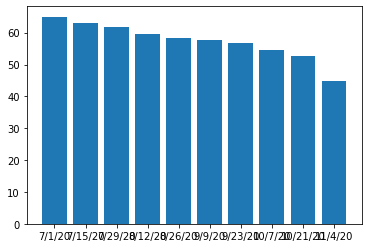

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(len(daily_updated_estimate)), list(daily_updated_estimate.values()), align='center')
plt.xticks(range(len(daily_updated_estimate)), list(daily_updated_estimate.keys()))

In [ ]:
uploaded = files.upload()

Saving file_31_1.csv to file_31_1.csv
Saving file_31_0.csv to file_31_0.csv
Saving file_30_1.csv to file_30_1.csv
Saving file_30_0.csv to file_30_0.csv
Saving file_29_1.csv to file_29_1.csv
Saving file_29_0.csv to file_29_0.csv
Saving file_28_1.csv to file_28_1.csv
Saving file_28_0.csv to file_28_0.csv
Saving file_27_1.csv to file_27_1.csv
Saving file_27_0.csv to file_27_0.csv
Saving file_26_1.csv to file_26_1.csv
Saving file_26_0.csv to file_26_0.csv
Saving file_24_1.csv to file_24_1.csv
Saving file_24_0.csv to file_24_0.csv
Saving file_23_1.csv to file_23_1.csv
Saving file_23_0.csv to file_23_0.csv
Saving file_21_1.csv to file_21_1.csv
Saving file_20_1.csv to file_20_1.csv
Saving file_20_0.csv to file_20_0.csv
Saving file_3_2.csv to file_3_2.csv
Saving file_3_1.csv to file_3_1.csv
Saving file_2_2.csv to file_2_2.csv
Saving file_2_1.csv to file_2_1.csv
Saving file_1_1.csv to file_1_1.csv
Saving file_1_0.csv to file_1_0.csv


In [ ]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''

    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        
        if analysis.sentiment.polarity == 0 or analysis.sentiment.subjectivity<0.5: 
          return 'neutral'
        elif analysis.sentiment.polarity > 0: 
          return 'positive'
            
        else: 
            return 'negative'
  
    def get_tweets(self,  fetched_tweets): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
          usernames=fetched_tweets['username'].tolist()
          tweet=fetched_tweets['text'].tolist()
          location=fetched_tweets['location'].tolist()
          for x in range(len(tweet)): 
                # empty dictionary to store required params of a tweet 
                parsed_tweet={'text':tweet[x],'sentiment': self.get_tweet_sentiment(tweet[x]),'User':usernames[x],'Location':location[x]}
                
                # appending parsed tweet to tweets list 
                tweets.append(parsed_tweet)
  
            # return parsed tweets 
          return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  

  


In [ ]:
state_codes={
    "Alaska": "AK",
    "Alabama" : "AL" ,
    "Arkansas":"AR",
    "Arizona":"AZ" ,
    "California ":"CA" ,
    "Colorado ":"CO", 
    "Connecticut ":"CT",
    "Delaware":"DE", 
    "Florida ":"FL",
    "Georgia ":"GA",
    "Hawaii ":"HI", 
    "Iowa ":"IA" ,
    "Idaho ":"ID" ,
    "Illinois ":"IL", 
    "Indiana ":"IN",
    "Kansas":"KS",
    "Kentucky ":"KY", 
    "Louisiana ":"LA", 
    "Massachusetts ":"ME", 
    "Maryland ":"MD" ,
    "Maine ":"ME" ,
    "Michigan ":"MI",
    "Minnesota ":"MN", 
    "Missouri ":"MO", 
    "Mississippi ":"MS", 
    "Montana ":"MT",
    "North Carolina":"NC" , 
    "North Dakota ":"ND", 
    "Nebraska ":"NE" ,
    "New Hampshire":"NH", 
    "New Jersey":"NJ",
    "New Mexico ":"NM" ,
    "Nevada ":"NV" ,
    "New York ":"NY" ,
    "Ohio ":"OH" ,
    "Oklahoma ":"OK",
    "Oregon ":"OR" ,
    "Pennsylvania":"PA"  ,
    "Rhode Island ":"RI" ,
    "South Carolina ":"SC" ,
    "South Dakota ":"SD" ,
    "Tennessee ":"TN" ,
    "Texas ":"TX" ,
    "Utah ":"UT" ,
    "Virginia ":"VA" ,
    "Vermont ":"VT",
    "Washington ":"WA" ,
    "Wisconsin ":"WI" ,
    "West Virginia ":"WV" ,
    "Wyoming":"WY" 
  }

Classifying the tweets using sentiment analysis to get the positive and negative for trump.

In [ ]:
def classifyByUser(national_daily_trump,file_trump,file_biden,final,trump_statewise_count,total_decided_statewise_count,trump_daily_statewise_count):
  # creating object of TwitterClient Class 
  api = TwitterClient() 
  # calling function to get tweets 
  fetched_tweets_trump=pd.read_csv(file_trump)
  tweets_trump = api.get_tweets(fetched_tweets_trump)
    
  
  fetched_tweets_biden=pd.read_csv(file_biden)
  tweets_biden = api.get_tweets(fetched_tweets_biden)
  Users={}
  Users_location={}
  #adding positive tweets for trump and subtracting negative tweets for trump
  for tweet in tweets_trump:
    user=tweet['User']
    Users_location[user]=tweet['Location']
    if user not in Users:
      Users[user]=0
    if tweet['sentiment'] == 'positive':
        Users[user]+=1
    elif tweet['sentiment'] == 'negative':
        Users[user]-=1


  #subtracting positive tweets for biden and adding negative tweets for biden
  
  for tweet in tweets_biden:
    user=tweet['User']
    Users_location[user]=tweet['Location']
    if user not in Users:
      Users[user]=0
    if tweet['sentiment'] == 'positive':
        Users[user]-=1
    elif tweet['sentiment'] == 'negative':
        Users[user]+=1
  pUsers=0
  nUsers=0
  
  
  for user in Users:
    if Users[user]>0:
      pUsers+=1
      if not final or not isinstance(Users_location[user],str):
        continue;
      for state in state_codes:
        option1="[ |,]"+state_codes[state]+"[ ]*$"
        x = re.search(option1, Users_location[user])
        y = re.search(state, Users_location[user])
        if x is not None or y is not None:
          trump_statewise_count[state]+=1
          total_decided_statewise_count[state]+=1
          break 
    elif Users[user]<0:
      nUsers+=1
      if not final or not isinstance(Users_location[user],str):
        continue;
      for state in state_codes:
        option1="[ |,]"+state_codes[state]+"[ ]*$"
        x = re.search(option1, Users_location[user])
        y = re.search(state, Users_location[user])
        if x is not None or y is not None:
          total_decided_statewise_count[state]+=1
          break 
  print("Positive User for trump percentage: {} %".format(100*pUsers/(pUsers+nUsers))) 
  national_daily_trump.append(100*pUsers/(pUsers+nUsers))
  
  print("Positive User for biden percentage: {} %".format(100*nUsers/(pUsers+nUsers))) 
  
  print("Neutral User percentage: {} %".format(100*(len(Users)-(pUsers+nUsers))/len(Users)))

  if not final:
    return
    print("statewise approval for trump")
  for state in state_codes:
    #print("{}:{}/{}".format(state,trump_statewise_count[state],total_decided_statewise_count[state]))
    if not total_decided_statewise_count[state]==0:
      print("{}: {}".format(state,(trump_statewise_count[state]*100)/total_decided_statewise_count[state]))
      trump_daily_statewise_count[state].append((trump_statewise_count[state]*100)/total_decided_statewise_count[state])

  count=0
  for state in state_codes:
    count+=total_decided_statewise_count[state]
  print(count)



In [ ]:
national_daily_trump=[]

trump_daily_statewise_count={
    "Alaska": [],
    "Alabama":[] ,
    "Arkansas":[] ,
    "Arizona":[] ,
    "California ":[] ,
    "Colorado ":[] ,
    "Connecticut ":[] ,
    "Delaware":[]  ,
    "Florida ":[] ,
    "Georgia ":[],
    "Hawaii ":[] ,
    "Iowa ":[] ,
    "Idaho ":[] ,
    "Illinois ":[] ,
    "Indiana ":[] ,
    "Kansas":[] ,
    "Kentucky ":[] ,
    "Louisiana ":[] ,
    "Massachusetts ":[] ,
    "Maryland ":[] ,
    "Maine ":[] ,
    "Michigan ":[], 
    "Minnesota ":[] ,
    "Missouri ":[] ,
    "Mississippi ":[] ,
    "Montana ":[] ,
    "North Carolina":[],
    "North Dakota ":[],
    "Nebraska ":[],
    "New Hampshire":[],
    "New Jersey":[], 
    "New Mexico ":[],
    "Nevada ":[],
    "New York ":[], 
    "Ohio ":[], 
    "Oklahoma ":[], 
    "Oregon ":[], 
    "Pennsylvania":[],  
    "Rhode Island ":[], 
    "South Carolina ":[], 
    "South Dakota ":[], 
    "Tennessee ":[], 
    "Texas ":[], 
    "Utah ":[], 
    "Virginia ":[], 
    "Vermont ":[], 
    "Washington ":[], 
    "Wisconsin ":[], 
    "West Virginia ":[], 
    "Wyoming":[] 
  }

In [ ]:
trump_statewise_count={
    "Alaska": 0,
    "Alabama":0 ,
    "Arkansas":0 ,
    "Arizona":0 ,
    "California ":0 ,
    "Colorado ":0 ,
    "Connecticut ":0 ,
    "Delaware":0  ,
    "Florida ":0 ,
    "Georgia ":0 ,
    "Hawaii ":0 ,
    "Iowa ":0 ,
    "Idaho ":0 ,
    "Illinois ":0 ,
    "Indiana ":0 ,
    "Kansas":0 ,
    "Kentucky ":0 ,
    "Louisiana ":0 ,
    "Massachusetts ":0 ,
    "Maryland ":0 ,
    "Maine ":0 ,
    "Michigan ":0, 
    "Minnesota ":0 ,
    "Missouri ":0 ,
    "Mississippi ":0 ,
    "Montana ":0 ,
    "North Carolina":0,
    "North Dakota ":0,
    "Nebraska ":0,
    "New Hampshire":0,
    "New Jersey":0, 
    "New Mexico ":0,
    "Nevada ":0,
    "New York ":0, 
    "Ohio ":0, 
    "Oklahoma ":0, 
    "Oregon ":0, 
    "Pennsylvania":0,  
    "Rhode Island ":0, 
    "South Carolina ":0, 
    "South Dakota ":0, 
    "Tennessee ":0, 
    "Texas ":0, 
    "Utah ":0, 
    "Virginia ":0, 
    "Vermont ":0, 
    "Washington ":0, 
    "Wisconsin ":0, 
    "West Virginia ":0, 
    "Wyoming":0 
  }
total_decided_statewise_count={
    "Alaska": 0,
    "Alabama":0,
    "Arkansas":0, 
    "Arizona":0, 
    "California ":0, 
    "Colorado ":0, 
    "Connecticut ":0, 
    "Delaware":0, 
    "Florida ":0, 
    "Georgia ":0, 
    "Hawaii ":0, 
    "Iowa ":0, 
    "Idaho ":0, 
    "Illinois ":0, 
    "Indiana ":0, 
    "Kansas":0, 
    "Kentucky ":0, 
    "Louisiana ":0, 
    "Massachusetts ":0, 
    "Maryland ":0, 
    "Maine ":0, 
    "Michigan ":0, 
    "Minnesota ":0, 
    "Missouri ":0, 
    "Mississippi ":0, 
    "Montana ":0, 
    "North Carolina":0,  
    "North Dakota ":0, 
    "Nebraska ":0, 
    "New Hampshire":0,  
    "New Jersey":0, 
    "New Mexico ":0, 
    "Nevada ":0, 
    "New York ":0, 
    "Ohio ":0, 
    "Oklahoma ":0, 
    "Oregon ":0, 
    "Pennsylvania":0,  
    "Rhode Island ":0, 
    "South Carolina ":0, 
    "South Dakota ":0, 
    "Tennessee ":0, 
    "Texas ":0, 
    "Utah ":0, 
    "Virginia ":0, 
    "Vermont ":0, 
    "Washington ":0, 
    "Wisconsin ":0, 
    "West Virginia ":0, 
    "Wyoming":0 
  }



In [ ]:
classifyByUser(national_daily_trump,"btp_data/file_31_0.csv","btp_data/file_31_1.csv",True,trump_statewise_count,total_decided_statewise_count,trump_daily_statewise_count)
print(len(national_daily_trump))

Positive User for trump percentage: 46.144483425216585 %
Positive User for biden percentage: 53.855516574783415 %
Neutral User percentage: 65.50421102027711 %
Alaska: 28.571428571428573
Alabama: 50.87719298245614
Arkansas: 41.37931034482759
Arizona: 43.97163120567376
California : 43.45238095238095
Colorado : 45.6140350877193
Connecticut : 41.1764705882353
Delaware: 27.272727272727273
Florida : 53.960396039603964
Georgia : 50.0
Hawaii : 81.25
Iowa : 44.44444444444444
Idaho : 27.272727272727273
Illinois : 46.98795180722892
Indiana : 50.0
Kansas: 47.05882352941177
Kentucky : 40.0
Louisiana : 44.0
Massachusetts : 50.0
Maryland : 44.44444444444444
Michigan : 46.666666666666664
Minnesota : 51.351351351351354
Missouri : 58.333333333333336
Mississippi : 66.66666666666667
Montana : 66.66666666666667
North Carolina: 42.98245614035088
North Dakota : 50.0
Nebraska : 50.0
New Hampshire: 56.25
New Jersey: 46.73913043478261
New Mexico : 55.55555555555556
Nevada : 58.13953488372093
New York : 44.76190

In [ ]:
trump_forecast={
    "Alaska": [],
    "Alabama":[] ,
    "Arkansas":[] ,
    "Arizona":[] ,
    "California ":[] ,
    "Colorado ":[] ,
    "Connecticut ":[] ,
    "Delaware":[]  ,
    "Florida ":[] ,
    "Georgia ":[],
    "Hawaii ":[] ,
    "Iowa ":[] ,
    "Idaho ":[] ,
    "Illinois ":[] ,
    "Indiana ":[] ,
    "Kansas":[] ,
    "Kentucky ":[] ,
    "Louisiana ":[] ,
    "Massachusetts ":[] ,
    "Maryland ":[] ,
    "Maine ":[] ,
    "Michigan ":[], 
    "Minnesota ":[] ,
    "Missouri ":[] ,
    "Mississippi ":[] ,
    "Montana ":[] ,
    "North Carolina":[],
    "North Dakota ":[],
    "Nebraska ":[],
    "New Hampshire":[],
    "New Jersey":[], 
    "New Mexico ":[],
    "Nevada ":[],
    "New York ":[], 
    "Ohio ":[], 
    "Oklahoma ":[], 
    "Oregon ":[], 
    "Pennsylvania":[],  
    "Rhode Island ":[], 
    "South Carolina ":[], 
    "South Dakota ":[], 
    "Tennessee ":[], 
    "Texas ":[], 
    "Utah ":[], 
    "Virginia ":[], 
    "Vermont ":[], 
    "Washington ":[], 
    "Wisconsin ":[], 
    "West Virginia ":[], 
    "Wyoming":[] 
  }

In [ ]:
state_electoral_count={
    "Alaska": 3,
    "Alabama" : 9 ,
    "Arkansas":6,
    "Arizona":11 ,
    "California ":55 ,
    "Colorado ":9, 
    "Connecticut ":7,
    "Delaware":3, 
    "Florida ":29,
    "Georgia ":16,
    "Hawaii ":4, 
    "Iowa ":6 ,
    "Idaho ":4 ,
    "Illinois ":20, 
    "Indiana ":11,
    "Kansas":6,
    "Kentucky ":8, 
    "Louisiana ":8, 
    "Massachusetts ":11, 
    "Maryland ":10 ,
    "Maine ":4 ,
    "Michigan ":16,
    "Minnesota ":10, 
    "Missouri ":10, 
    "Mississippi ":6, 
    "Montana ":3,
    "North Carolina":15 , 
    "North Dakota ":3, 
    "Nebraska ":5,
    "New Hampshire":4, 
    "New Jersey":14,
    "New Mexico ":5 ,
    "Nevada ":6 ,
    "New York ":29 ,
    "Ohio ":18 ,
    "Oklahoma ":7,
    "Oregon ":7 ,
    "Pennsylvania":20  ,
    "Rhode Island ":4 ,
    "South Carolina ":9 ,
    "South Dakota ":3 ,
    "Tennessee ":11 ,
    "Texas ":38 ,
    "Utah ":6 ,
    "Virginia ":13 ,
    "Vermont ":3,
    "Washington ":12 ,
    "Wisconsin ":10 ,
    "West Virginia ":5 ,
    "Wyoming":3 
  }

In [ ]:
long_term_model={
    "Alaska": 60.4,
    "Alabama" : 65.9 ,
    "Arkansas":62.0,
    "Arizona":56.0 ,
    "California ":39.9 ,
    "Colorado ":49.3, 
    "Connecticut ":45.8,
    "Delaware":45.9, 
    "Florida ":53.4,
    "Georgia ":55.2,
    "Hawaii ":38.9, 
    "Iowa ":54.5 ,
    "Idaho ":68 ,
    "Illinois ":43.6, 
    "Indiana ":60,
    "Kansas":61.6,
    "Kentucky ":64.9, 
    "Louisiana ":61.4, 
    "Massachusetts ":39.1, 
    "Maryland ":40.6 ,
    "Maine ":49.1,
    "Michigan ":51.0,
    "Minnesota ":50.1, 
    "Missouri ":58.5, 
    "Mississippi ":61.3, 
    "Montana ":61.8,
    "North Carolina":54 , 
    "North Dakota ":66.7, 
    "Nebraska ":64.1,
    "New Hampshire":51.2, 
    "New Jersey":46.7,
    "New Mexico ":47.1 ,
    "Nevada ":49.3 ,
    "New York ":41.9 ,
    "Ohio ":55.2 ,
    "Oklahoma ":68.9,
    "Oregon ":45.7 ,
    "Pennsylvania":51.8  ,
    "Rhode Island ":44.0 ,
    "South Carolina ":59.3 ,
    "South Dakota ":63.7 ,
    "Tennessee ":63.8 ,
    "Texas ":59 ,
    "Utah ":64.3 ,
    "Virginia ":50.7 ,
    "Vermont ":37.2,
    "Washington ":44.5 ,
    "Wisconsin ":51.4 ,
    "West Virginia ":67.9 ,
    "Wyoming":72.8 
  }

We now apply the average value calculation with previous day values to predict daily chances and final forcast of trump winning in an array for each day.

In [ ]:
trump_forecast=trump_daily_statewise_count

In [ ]:
#calculating total seates for each state
def calc_prediction(date,x):
  total=0
  for state in state_electoral_count:
    print(state)
    #print(trump_forecast[state])
    if len(trump_forecast[state])>0:
      trump_pos=(1-x)*trump_forecast[state][-1]+(x)*long_term_model[state]
    else:
      trump_pos=long_term_model[state]
    print(trump_pos)
    prediction_by_date[date][state]=trump_pos
    if trump_pos>50:
      trump_pos=1
    else:
      trump_pos=0
    total+=trump_pos*state_electoral_count[state]
  prediction_by_date[date]["total"]=total
  return total


#trump_pos*state_electoral_count=total  where trump_pos=1 or 0

In [ ]:
prediction_by_date={
    "1":{},
    "8":{},
    "15":{},
    "22":{},
    "29":{},
    "5":{}
}


In [ ]:
print(calc_prediction("5",0))
tot=0
for state in state_electoral_count:
  tot+=state_electoral_count[state]
print(tot)
#prediction_by_date[]=calc_prediction(x)


Alaska
28.571428571428573
Alabama
50.87719298245614
Arkansas
41.37931034482759
Arizona
43.97163120567376
California 
43.45238095238095
Colorado 
45.6140350877193
Connecticut 
41.1764705882353
Delaware
27.272727272727273
Florida 
53.960396039603964
Georgia 
50.0
Hawaii 
81.25
Iowa 
44.44444444444444
Idaho 
27.272727272727273
Illinois 
46.98795180722892
Indiana 
50.0
Kansas
47.05882352941177
Kentucky 
40.0
Louisiana 
44.0
Massachusetts 
50.0
Maryland 
44.44444444444444
Maine 
49.1
Michigan 
46.666666666666664
Minnesota 
51.351351351351354
Missouri 
58.333333333333336
Mississippi 
66.66666666666667
Montana 
66.66666666666667
North Carolina
42.98245614035088
North Dakota 
50.0
Nebraska 
50.0
New Hampshire
56.25
New Jersey
46.73913043478261
New Mexico 
55.55555555555556
Nevada 
58.13953488372093
New York 
44.76190476190476
Ohio 
37.03703703703704
Oklahoma 
42.10526315789474
Oregon 
56.81818181818182
Pennsylvania
44.52054794520548
Rhode Island 
16.666666666666668
South Carolina 
50.0
South D

In [ ]:
prediction_by_date


{'16': {'Alabama': 58.87708644866944,
  'Alaska': 61.91377334594726,
  'Arizona': 52.20218372344971,
  'Arkansas': 56.77766132354736,
  'California ': 40.65420227050781,
  'Colorado ': 46.07982501983642,
  'Connecticut ': 45.95890960693359,
  'Delaware': 48.16160659790039,
  'Florida ': 50.359244155883786,
  'Georgia ': 50.17020454406739,
  'Hawaii ': 39.31447772979736,
  'Idaho ': 69.1389102935791,
  'Illinois ': 45.41085929870606,
  'Indiana ': 56.6287784576416,
  'Iowa ': 51.07085418701172,
  'Kansas': 59.02621479034424,
  'Kentucky ': 53.07521419525147,
  'Louisiana ': 70.28028945922851,
  'Maine ': 36.825,
  'Maryland ': 53.489709091186526,
  'Massachusetts ': 37.61855621337891,
  'Michigan ': 49.314345359802246,
  'Minnesota ': 47.24490184783936,
  'Mississippi ': 60.63838634490966,
  'Missouri ': 47.991281509399414,
  'Montana ': 62.62414512634277,
  'Nebraska ': 67.24207038879393,
  'Nevada ': 47.091356849670404,
  'New Hampshire': 48.12143363952637,
  'New Jersey': 44.37092437